Its not recommended practice to add image in PPTX plot 

all plot should be done using native PPTX API

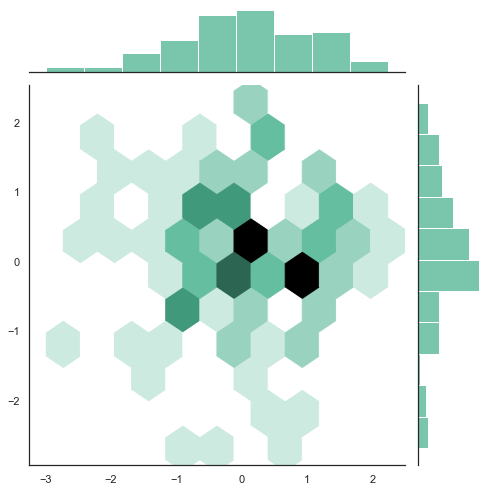

In [11]:
import seaborn as sns
import numpy as np
from pptx import Presentation
from pptx.util import Inches, Pt
from pptx.enum.text import MSO_ANCHOR, MSO_AUTO_SIZE
#from pptx.enum.table import MSO_ROW_SIZE_TYPE, MSO_COL_WIDTH_TYPE
import io

# Create a new PowerPoint presentation
prs = Presentation()

# Create a title slide
title_slide_layout = prs.slide_layouts[0]
slide = prs.slides.add_slide(title_slide_layout)

# Add the title and subtitle
title = slide.shapes.title
subtitle = slide.placeholders[1]
title.text = "Awesome Presentation"
subtitle.text = "Using PPTX Python Package"

# Create a slide for the plot
plot_slide_layout = prs.slide_layouts[5]
slide = prs.slides.add_slide(plot_slide_layout)

# Add a title to the slide
title = slide.shapes.title
title.text = "Distribution of Random Data"

# Generate some random data
data1 = np.random.normal(size=100)
data2 = np.random.normal(size=100)

# Create a seaborn plot with subplots and save it to a file
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
grid = sns.jointplot(x=data1, y=data2, kind="hex", color="#4CB391", height=7)
image_stream = io.BytesIO()
grid.savefig(image_stream)

# Add the seaborn plot to the slide
left = Inches(1)
top = Inches(2)
height = Inches(5)
pic = slide.shapes.add_picture('hexplot.png', left, top, height=height)

# Add a text box for the plot title
plot_title = slide.shapes.add_textbox(left, top-Inches(0.8), height=Inches(0.5), width=Inches(5))
plot_title.text = "Hexbin Plot of Random Data"
plot_title.text_frame.paragraphs[0].font.size = Pt(18)
plot_title.text_frame.paragraphs[0].font.bold = True

# Add a text box for the x-axis label
x_label = slide.shapes.add_textbox(left, top+height+Inches(0.2), height=Inches(0.5), width=Inches(4))
x_label.text = "Data 1"
x_label.text_frame.paragraphs[0].font.size = Pt(14)
x_label.text_frame.paragraphs[0].font.bold = True

# Add a text box for the y-axis label
y_label = slide.shapes.add_textbox(left-Inches(0.8), top+height/2, height=Inches(0.5), width=Inches(1))
y_label.text = "Data 2"
y_label.text_frame.paragraphs[0].font.size = Pt(14)
y_label.text_frame.paragraphs[0].font.bold = True
y_label.text_frame.paragraphs[0].rotation = -90
#y_label.text_frame.paragraphs[0].anchor = MSO_ANCHOR.MIDDLE_CENTER

# Add a text box for the plot description
description = slide.shapes.add_textbox(left+height/2, top+height+Inches(0.5), height=Inches(1), width=Inches(5))
description.text = "This is a hexbin plot of 100 random data points generated from two normal distributions. The x-axis represents Data 1 and the y-axis represents Data 2."

# Save the PowerPoint presentation to a file
prs.save("my_test2.pptx")
